# Ejercicio análisis time series

En este ejercicio vamos a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide:

1. Importa los datos 'df_furniture.csv' (en la carpeta data)
2. Trata la fecha como texto. Crea una columna para el año, mes y día, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cargamos los datos

In [35]:
df = pd.read_csv('data/df_furniture.csv')
df['value'] = df['furniture_price_adjusted']
df.drop('furniture_price_adjusted', 1, inplace=True)

all_dates = pd.date_range(start='1992-01-01',
                         end = '2019-07-01',
                         freq = 'MS')
df['Month'] = all_dates
df.set_index('Month', drop=True, inplace=True)

df.tail(20)

,value
Month,
2017-12-01,10833.501852
2018-01-01,8417.343128
2018-02-01,8266.943270
2018-03-01,9754.740971
2018-04-01,8973.885759
2018-05-01,9733.086145
2018-06-01,9554.807941
2018-07-01,9542.663403
2018-08-01,10010.598100


## 2. Tratar la fecha como texto y parsear

In [34]:
df = pd.read_csv('data/df_furniture.csv')
df2 = df.copy()
df2.dropna(inplace=True)
#df2['Month'] = df2.index
df2['Month'] = df2['Month'].astype(str)

df2[['year', 'month', 'day']] = df2['Month'].str.split('-', expand=True)
df2['year'] = df2['year'].astype(int)
df2['month'] = df2['month'].astype(int)
df2['day'] = df2['day'].astype(int)

df2['new_date'] = pd.to_datetime(df2[['year', 'month', 'day']])
df2.head()

,Month,furniture_price_adjusted,year,month,day,new_date
0,1992-01-01,2073.432724,1992,1,1,1992-01-01
1,1992-02-01,2114.485812,1992,2,1,1992-02-01
2,1992-03-01,2260.570891,1992,3,1,1992-03-01
3,1992-04-01,2255.103236,1992,4,1,1992-04-01
4,1992-05-01,2331.414618,1992,5,1,1992-05-01


## 3. ¿De qué fecha a qué fecha va el histórico?

La serie va desde enero de 1992 a julio de 2019

In [40]:
print(df.index.min())
print(df.index.values.max())

1992-01-01 00:00:00
2019-07-01T00:00:00.000000000


## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

Se ve que tiene una clara tendencia al alza, a pesar de una pequeña bajada en als acciones en el 2007.

También apreciamos estacionalidad, al cumplirse cierto patrón a lo largo del tiempo

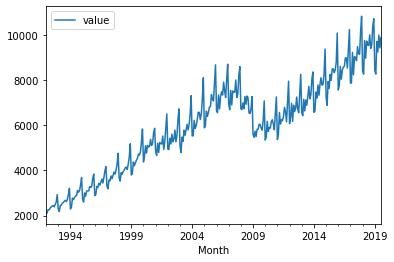

In [41]:
df.plot();

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [43]:
from statsmodels.tsa.stattools import adfuller

adfuller(df['value'].values)[1]

0.7035529748090005

In [45]:
df[0:int(len(df)/2)].describe()

,value
count,165.000000
mean,4366.695881
std,1412.738867
min,2073.432724
25%,3115.400080
50%,4275.168742
75%,5428.334524
max,8110.153770


In [46]:
df[int(len(df)/2):].describe()

,value
count,166.000000
mean,7575.142501
std,1270.370560
min,5349.481724
25%,6613.056182
50%,7345.578004
75%,8439.580036
max,10833.501852


## 6. ¿Conoces algún método para representar mejor la tendencia?

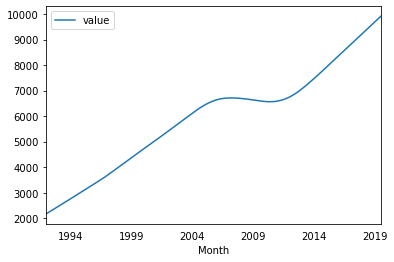

In [53]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

df_loess_5 = pd.DataFrame(lowess(df['value'], np.arange(len(df['value'])), frac=0.35)[:, 1], index=df.index, columns=['value'])
df_loess_5.plot();

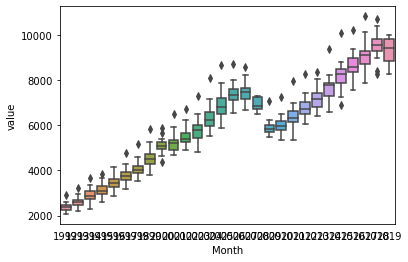

In [52]:
import seaborn as sns
sns.boxplot(x=df.index.year, y='value', data=df);

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

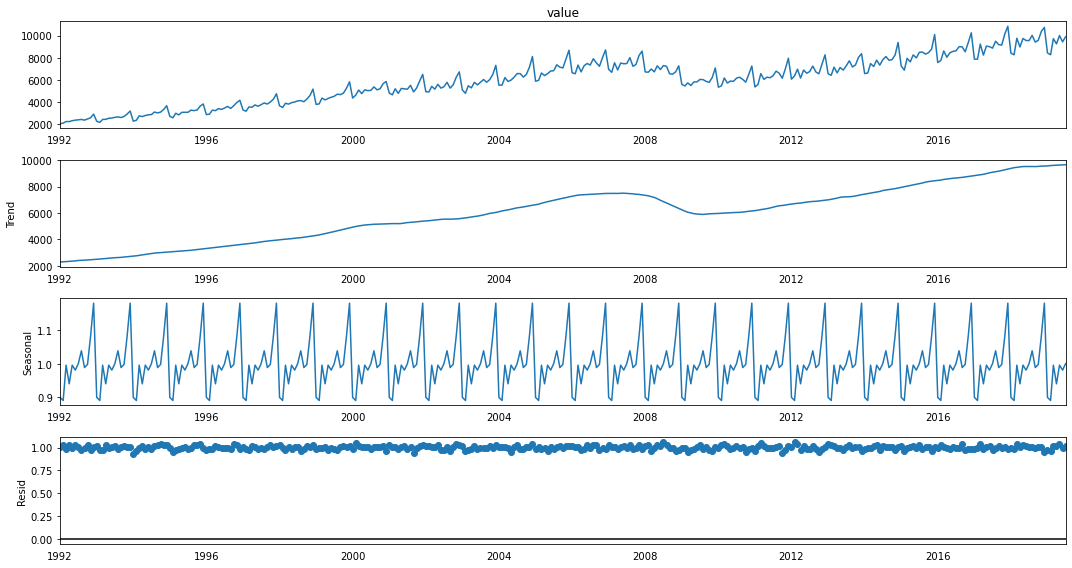

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')


# Plot
plt.rcParams.update({'figure.figsize': (15,8)})
result_mul.plot()
plt.show();

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

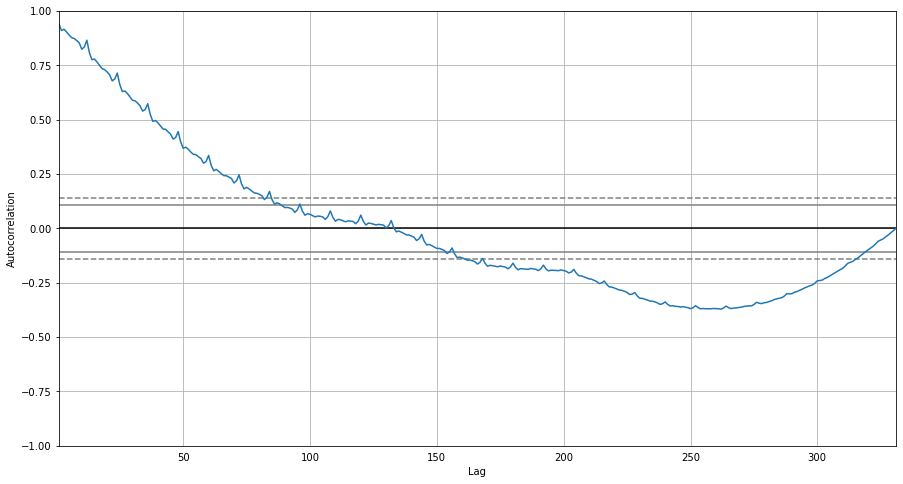

In [57]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.value);

Bien hecho. Pues ahora que dominas esta parte, pasemos con 

9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

## 9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.

In [60]:
df2 = df[['value']].copy()
df2['lag1'] = df2['value'].shift(1)
df2['lag2'] = df2['value'].shift(2)
df2['lag3'] = df2['value'].shift(3)
df2['lag4'] = df2['value'].shift(4)
df2['lag5'] = df2['value'].shift(5)
df2.corr()

,value,lag1,lag2,lag3,lag4,lag5
value,1.000000,0.951005,0.928338,0.945035,0.940613,0.935901
lag1,0.951005,1.000000,0.950599,0.927538,0.944637,0.939980
lag2,0.928338,0.950599,1.000000,0.950224,0.926949,0.944155
lag3,0.945035,0.927538,0.950224,1.000000,0.949927,0.926156
lag4,0.940613,0.944637,0.926949,0.949927,1.000000,0.949554
lag5,0.935901,0.939980,0.944155,0.926156,0.949554,1.000000


## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

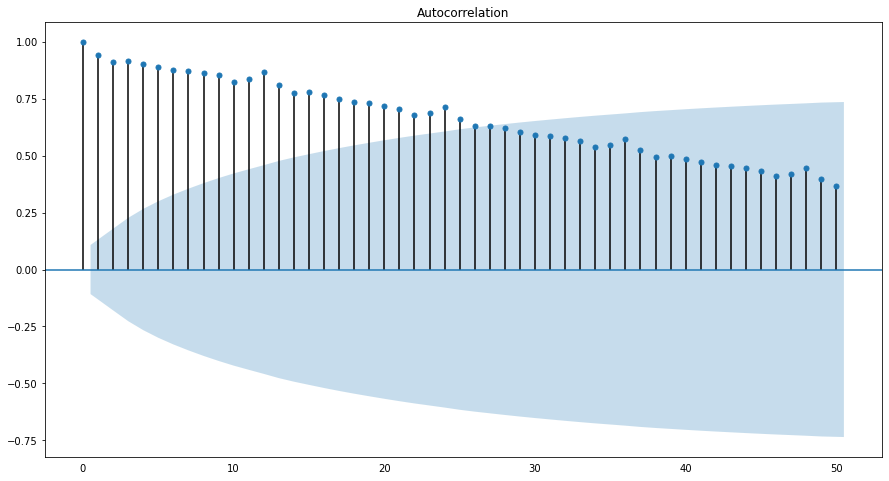

In [61]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['value'], lags=50);

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

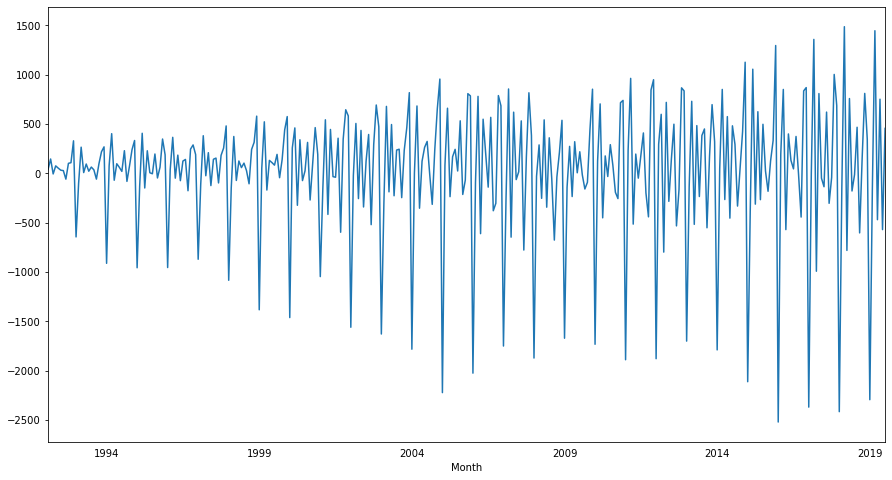

In [62]:
diferencio = df['value'].diff(1).dropna()

diferencio.plot();